In [76]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')
import numpy as np
% load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
from gplib.gpc import GPCLaplace, GPCSparse
from gplib.covfun import SE

In [78]:
dim = 2
num = 200
test_num= 100
x_tr = np.random.rand(num, dim)
if dim == 1:
    x_te = np.linspace(0, 1, test_num)
    x_te = x_test.reshape(test_num, 1)
else:
    x_te = np.random.rand(test_num, dim)

In [79]:
data_gp = GPCLaplace(SE(np.array([1., .2, .1])))

In [80]:
y_tr, y_te = data_gp.generate_data(x_tr, x_te, seed=21)

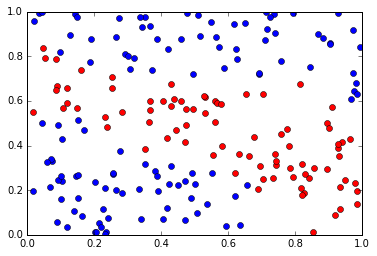

In [81]:
plt.plot(x_tr[y_tr[:, 0] == 1, 0], x_tr[y_tr[:, 0] == 1, 1], 'bo')
plt.plot(x_tr[y_tr[:, 0] == -1, 0], x_tr[y_tr[:, 0] == -1, 1], 'ro')

## Laplace

In [82]:
gp = GPCLaplace(SE(np.array([2., .5, .2])))

In [83]:
gp.fit(x_tr, y_tr, max_iter=10)

Iteration  0
Hyper-parameters at iteration  0 :  [ 3.72842957  0.47447809  0.14722251]


([array([ 3.72842957,  0.47447809,  0.14722251]),
  array([ 5.26062563,  0.43637476,  0.10598828]),
  array([ 4.68536482,  0.34186211,  0.13121642]),
  array([ 4.35141912,  0.2854827 ,  0.14225166]),
  array([ 4.4445449 ,  0.25316511,  0.09388804]),
  array([ 4.20718171,  0.2119067 ,  0.14837086]),
  array([ 4.25483462,  0.19576078,  0.18509236]),
  array([ 4.43675605,  0.19165586,  0.11249917]),
  array([ 4.20804566,  0.17536158,  0.12540132]),
  array([ 4.21919936,  0.16906438,  0.12090407])],
 [0.7464599609375,
  1.3572471141815186,
  2.334963083267212,
  3.28900408744812,
  4.055470943450928,
  4.953321933746338,
  5.528271913528442,
  6.314549922943115,
  7.804825067520142,
  8.293437004089355])

In [84]:
y_pred = gp.predict(x_te, x_tr, y_tr)

In [85]:
gp.get_quality(y_te, y_pred)

0.95999999999999996

## Inducing Inputs
### svi

In [86]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [87]:
options = {'maxiter': 30, 
           'verbose': True, 'batch_size':20, 'step_rate': 0.5, 'decay': 0.8,
           'print_freq': 10}
res = gp.fit(x_tr, y_tr, method='svi', options=options)

Using AdaDelta optimizer
Iteration  10 :
	Gradient norm 2.97140722206
Iteration  20 :
	Gradient norm 1.92072784751
Iteration  30 :
	Gradient norm 2.41237782644


In [88]:
y_pred = gp.predict(x_te)

In [89]:
gp.get_quality(y_te, y_pred)

0.90000000000000002

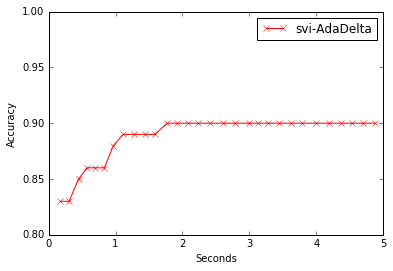

In [90]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-rx', label='svi-AdaDelta')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ

In [91]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [92]:
options = {'maxfun': 5, 'mydisp': True, 'n_upd':5, 'maxiter':20}
res = gp.fit(x_tr, y_tr, method='vi_jj', options=options)

In [93]:
y_pred = gp.predict(x_te)

In [94]:
gp.get_quality(y_te, y_pred)

0.92999999999999994

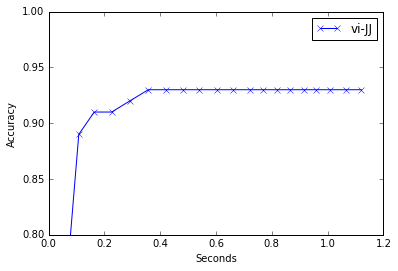

In [95]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-Taylor

In [96]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [97]:
options = {'maxfun': 5, 'disp': False, 'mydisp': True, 'n_upd':5}
res = gp.fit(x_tr, y_tr, method='vi_taylor', options=options)

In [98]:
y_pred = gp.predict(x_te)

In [99]:
gp.get_quality(y_te, y_pred)

0.94999999999999996

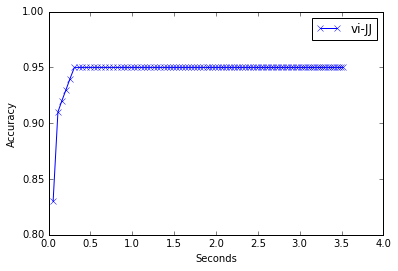

In [100]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ-hybrid

In [101]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [102]:
options = {'maxfun': 5, 'disp': False, 'mydisp': True, 'n_upd':5, 'maxiter':10}
res = gp.fit(x_tr, y_tr, method='vi_jj_hybrid', options=options)

In [103]:
y_pred = gp.predict(x_te)

In [104]:
gp.get_quality(y_te, y_pred)

0.92999999999999994

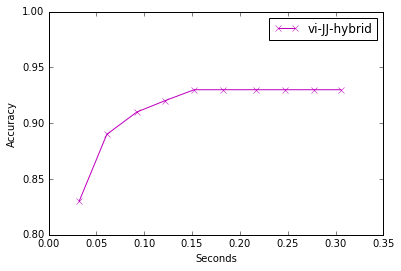

In [105]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-mx', label='vi-JJ-hybrid')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ-full

In [106]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [107]:
options = {'maxiter': 10, 'disp': False, 'mydisp': True}
res = gp.fit(x_tr, y_tr, method='vi_jj_full', options=options)

In [108]:
y_pred = gp.predict(x_te)

In [109]:
gp.get_quality(y_te, y_pred)

0.91000000000000003

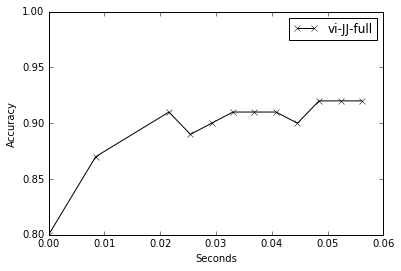

In [110]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-kx', label='vi-JJ-full')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')